Olá, tudo bem? Meu nome é Thiago e lhe dou as boas vindas a mais um curso de Machine Learning da Alura, no qual aprenderemos o que é a dimensão de um dado, o que são dados de alta dimensionalidade e como lidar com eles.

Nosso projeto tem a proposta de desenvolver a Alura_care, uma startup fictícia que tem por objetivo reduzir o número de exames necessários para o diagnóstico de um tipo específico de câncer. Para isso, iniciaremos um pré-processamento dos dados, aprendendo a identificar, por exemplo, células vazias, e como lidar com esse tipo de problema. Também identificaremos valores constantes nos dados e como eles podem impactar ou não no processo de classificação, além de como a correlação influe neste mesmo processo.

Feito isso, iniciaremos os métodos de seleção de features automáticos, como o SelectKBest e o RFE. Além disso, conseguiremos determinar qual o conjunto que nos gerará o melhor resultado possível no processo de classificação, quantas features precisaremos e quais são essas features.

Por último, aprenderemos como visualizar em um plano um dado de alta dimensionalidade, reduzindo a dimensão mas mantendo o maior número possível de informações.

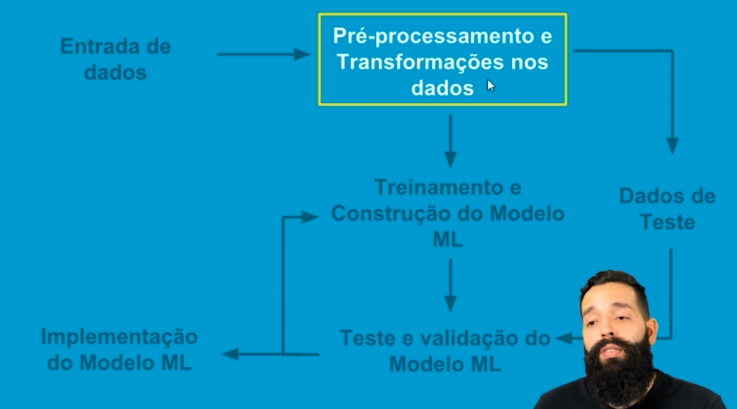

Nesse curso de Machine Learning aprenderemos a lidar com dados de alta dimensionalidade. Na construção de um modelo de Machine Learning, começamos com a entrada de dados. Após essa etapa, precisamos fazer um pré-processamento e a transformação dos dados recebidos para torná-los acessíveis aos algoritmos de Machine Learning. Depois, realizamos a segregação entre dados de teste e dados de treinamento.

Com os dados de treinamento, iniciamos a construção do modelo de Machine Learning. Feita essa construção, realizamos um teste e uma validação do modelo. Caso os resultados não sejam os esperados, retornamos para a construção do modelo, entrando em um loop chamado de "loop de treino e teste". Já se atingimos o resultado esperado, partimos para a implementação do modelo.

Nosso curso passará por praticamente todo o fluxo da construção de um modelo de Machine Learning, com foco principalmente no pré-processamento e na transformação de dados com alta dimensionalidade. Mas o que são dimensões de um dado?

Temos 33 dimensões nessa base de dados, e a questão que a Alura Care deseja responder é: **será possível reduzirmos a necessidade de tantos exames para chegar a um diagnóstico de maneira efetiva?** Juntos, responderemos essa questão!

dados originais = https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [1]:
import pandas as pd
from numpy import random

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

In [45]:
from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV

In [73]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [6]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:, inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')

    plt.figure(figsize = (10, 10))
    sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data=dados_plot, split = True,
                   linewidth = 1, width = 0.9, inner = 'quartile')  # Ajustes feitos aqui
    plt.xticks(rotation=90)
    plt.title('Distribuição dos Valores dos Exames por Diagnóstico')
    plt.xlabel('Exames')
    plt.ylabel('Valores')
    plt.legend(title='Diagnóstico')
    plt.show()

In [7]:
resultados_exames = pd.read_csv('dados_exames.csv')
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [8]:
resultados_exames.shape

(569, 35)

In [9]:
SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(['id', 'diagnostico'], axis = 1)
diagnostico = resultados_exames['diagnostico']

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico)

In [10]:
treino_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
114,8.726,15.83,55.84,103.78,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,...,64.48,284.4,0.17240,0.23640,0.24560,0.786,0.10500,0.2926,0.10170,NaN
457,13.210,25.25,84.10,103.78,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,91.29,632.9,0.12890,0.10630,0.13900,0.786,0.06005,0.2444,0.06788,NaN
269,10.710,20.39,69.50,103.78,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,...,76.51,410.4,0.13350,0.25500,0.25340,0.786,0.08600,0.2605,0.08701,NaN
520,9.295,13.90,59.96,103.78,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,...,67.84,326.6,0.18500,0.20970,0.09996,0.786,0.07262,0.3681,0.08982,0.505731
38,14.990,25.20,95.54,103.78,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,...,95.54,698.8,0.09387,0.05131,0.02398,0.786,0.02899,0.1565,0.05504,NaN


In [11]:
treino_y.head()

114    B
457    B
269    B
520    B
38     M
Name: diagnostico, dtype: object

In [12]:
classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print(classificador.score(teste_x, teste_y))


0.9370629370629371


## Tratamento dados nulos

In [13]:
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [14]:
porcentagem_nulos_por_coluna = resultados_exames.isnull().mean()*100

print(porcentagem_nulos_por_coluna)

id              0.000000
diagnostico     0.000000
exame_1         0.000000
exame_2         0.000000
exame_3         0.000000
exame_4         0.000000
exame_5         0.000000
exame_6         0.000000
exame_7         0.000000
exame_8         0.000000
exame_9         0.000000
exame_10        0.000000
exame_11        0.000000
exame_12        0.000000
exame_13        0.000000
exame_14        0.000000
exame_15        0.000000
exame_16        0.000000
exame_17        0.000000
exame_18        0.000000
exame_19        0.000000
exame_20        0.000000
exame_21        0.000000
exame_22        0.000000
exame_23        0.000000
exame_24        0.000000
exame_25        0.000000
exame_26        0.000000
exame_27        0.000000
exame_28        0.000000
exame_29        0.000000
exame_30        0.000000
exame_31        0.000000
exame_32        0.000000
exame_33       73.637961
dtype: float64


Como a maioria dos dados do exame 33 é nulo, 73,63% dos dados, o melhor é remover a coluna

In [15]:
SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(['id', 'diagnostico'], axis = 1)
diagnostico = resultados_exames['diagnostico']
valores_exames_v1 = valores_exames.drop(['exame_33'], axis = 1)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print(f'Resultado da classificação: {classificador.score(teste_x, teste_y) * 100:.2f}%')

Resultado da classificação: 92.40%


Utilização do Dummies para comparar se o resultado anterior é bom para ser usado como baseline quando for reduzir a dimensionalidade. 
A estratégia que será utilizada é do diagnóstico com mais frequente

In [16]:
SEED = 123143
random.seed(SEED)

classificador_dummies = DummyClassifier(strategy = 'most_frequent')
classificador_dummies.fit(treino_x, treino_y)
print(f'Resultado da classificação dummies: {classificador_dummies.score(teste_x, teste_y) * 100:.2f}%')

Resultado da classificação dummies: 66.67%


Como o valor do Dummies chegou nem perto, realmente utilizaremos o valor do classificador como baseline, o valor é de 92.40%

Para saber os valores de cada exame em relação a benigno e maligno

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

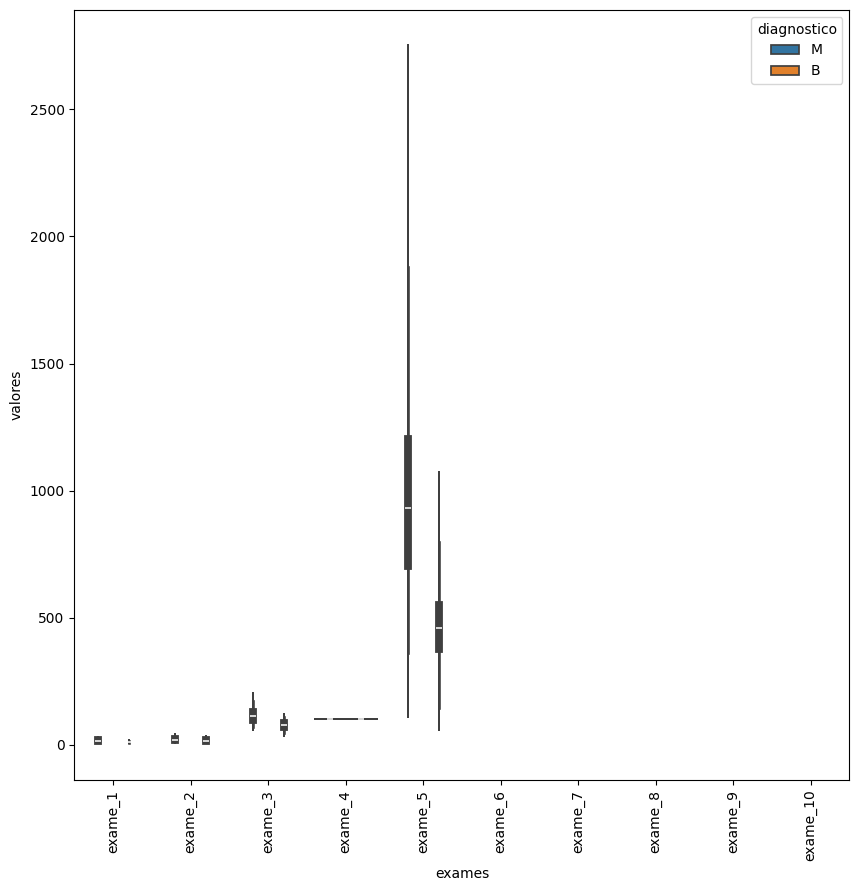

In [17]:
dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:, 0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')

plt.figure(figsize = (10, 10))
sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot)
plt.xticks(rotation = 90) # rodar a legenda x

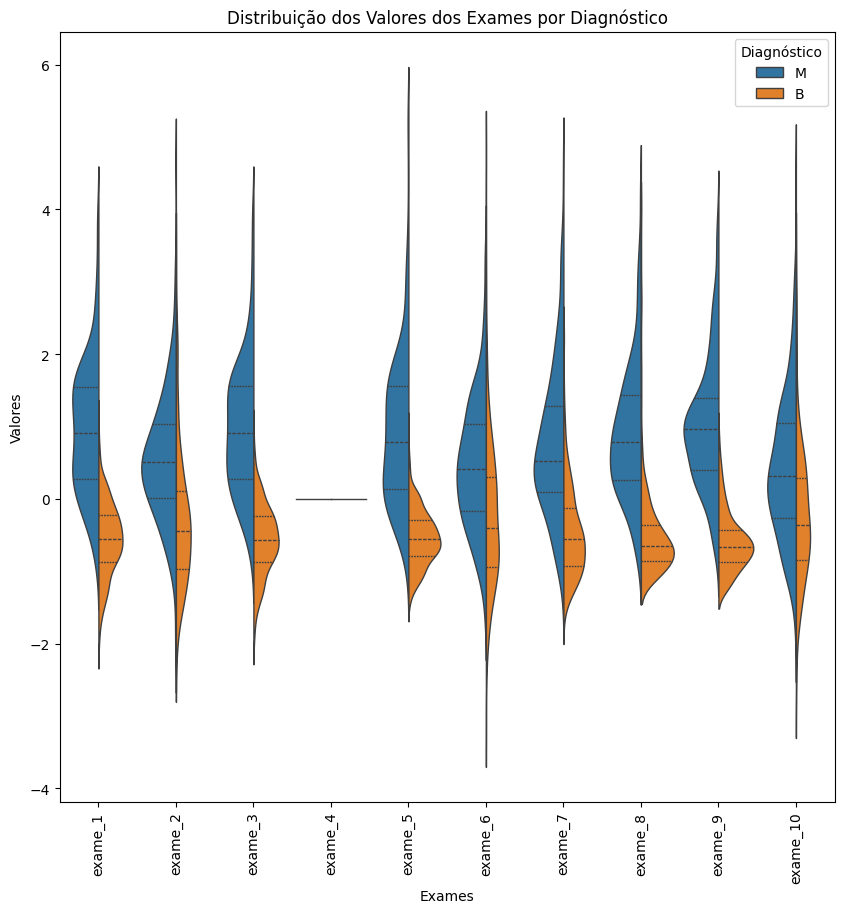

In [18]:
padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns = valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:, 0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')

plt.figure(figsize=(10, 10))
sns.violinplot(x='exames', y='valores', hue='diagnostico', data=dados_plot, split=True,
               linewidth=1, width=0.9, inner='quartile')  # Ajustes feitos aqui
plt.xticks(rotation=90)
plt.title('Distribuição dos Valores dos Exames por Diagnóstico')
plt.xlabel('Exames')
plt.ylabel('Valores')
plt.legend(title='Diagnóstico')
plt.show()

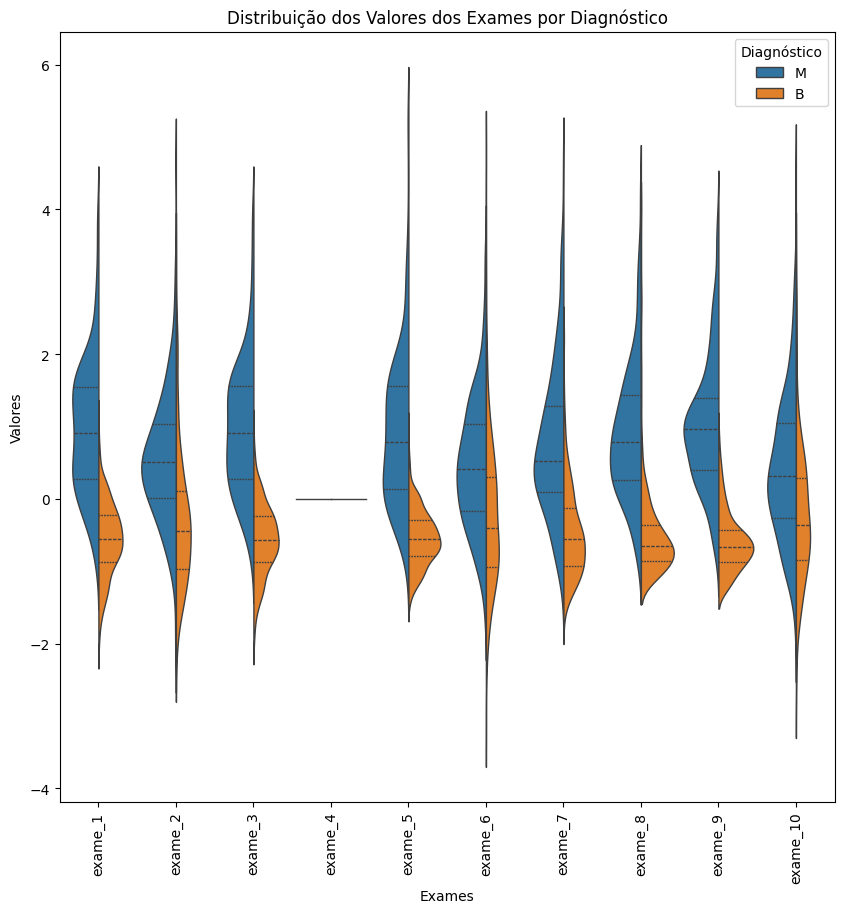

In [19]:
grafico_violino(valores_exames_v2, 0, 10)

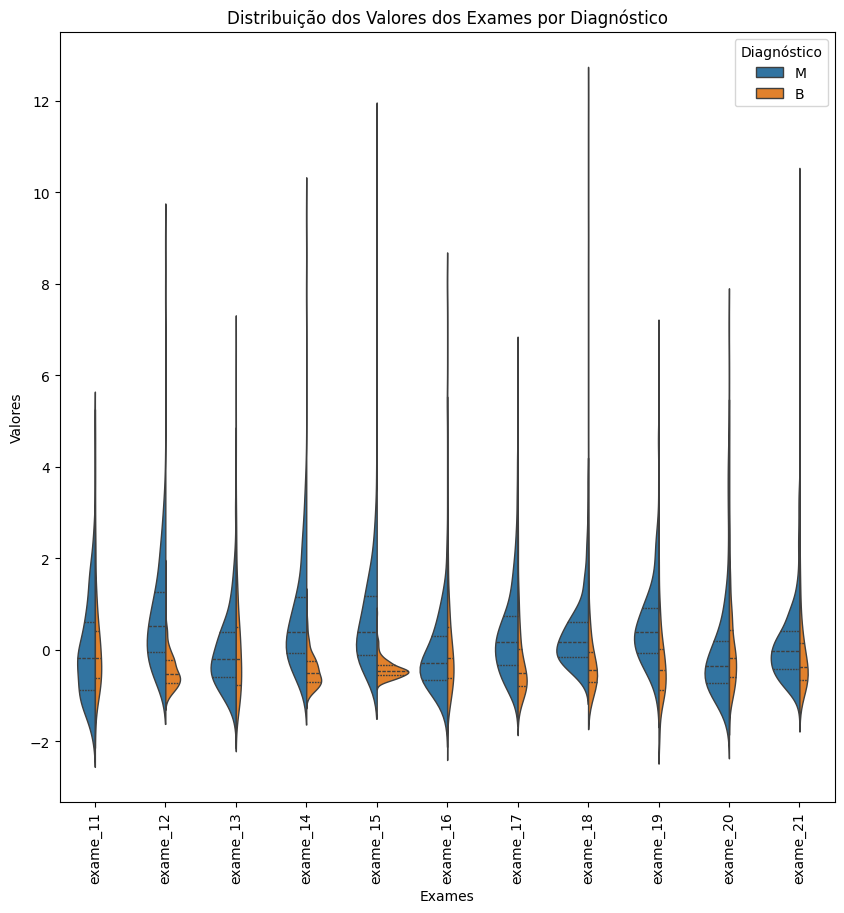

In [20]:
grafico_violino(valores_exames_v2, 10, 21)

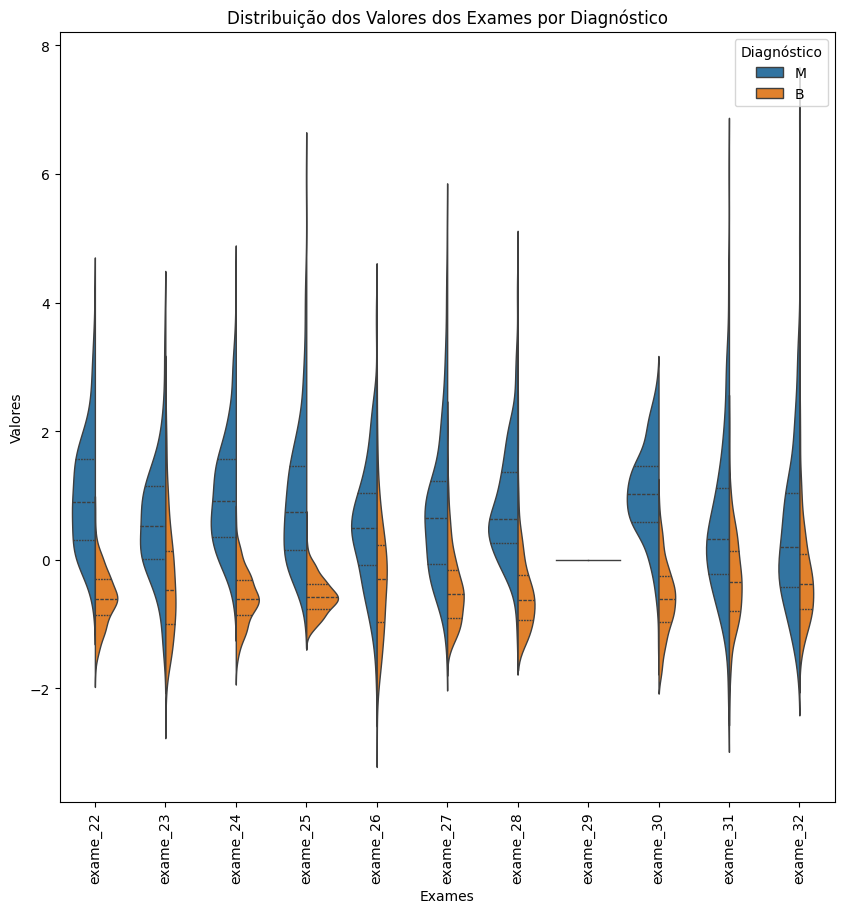

In [21]:
grafico_violino(valores_exames_v2, 21, 32)

In [22]:
valores_exames_v1['exame_4']

0      103.78
1      103.78
2      103.78
3      103.78
4      103.78
        ...  
564    103.78
565    103.78
566    103.78
567    103.78
568    103.78
Name: exame_4, Length: 569, dtype: float64

In [23]:
valores_exames_v1['exame_29']

0      0.786
1      0.786
2      0.786
3      0.786
4      0.786
       ...  
564    0.786
565    0.786
566    0.786
567    0.786
568    0.786
Name: exame_29, Length: 569, dtype: float64

Conclusões:
1. Exame 4 e 29 são valores constantes, ou seja, não está impactando nos nossos resultados, podemos então eliminar essas features

In [24]:
valores_exames_v3 = valores_exames_v2.drop(['exame_4', 'exame_29'], axis = 1)

In [25]:
def classificar(valores):
    SEED = 1234
    random.seed(SEED)

    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)
    print(f'Resultado da classificação: {classificador.score(teste_x, teste_y) * 100:.2f}%')

In [26]:
classificar(valores_exames_v3)

Resultado da classificação: 92.98%


## Matriz de correlação

In [27]:
valores_exames_v3

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [28]:
matriz_correlacao = valores_exames_v3.corr()
matriz_correlacao

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

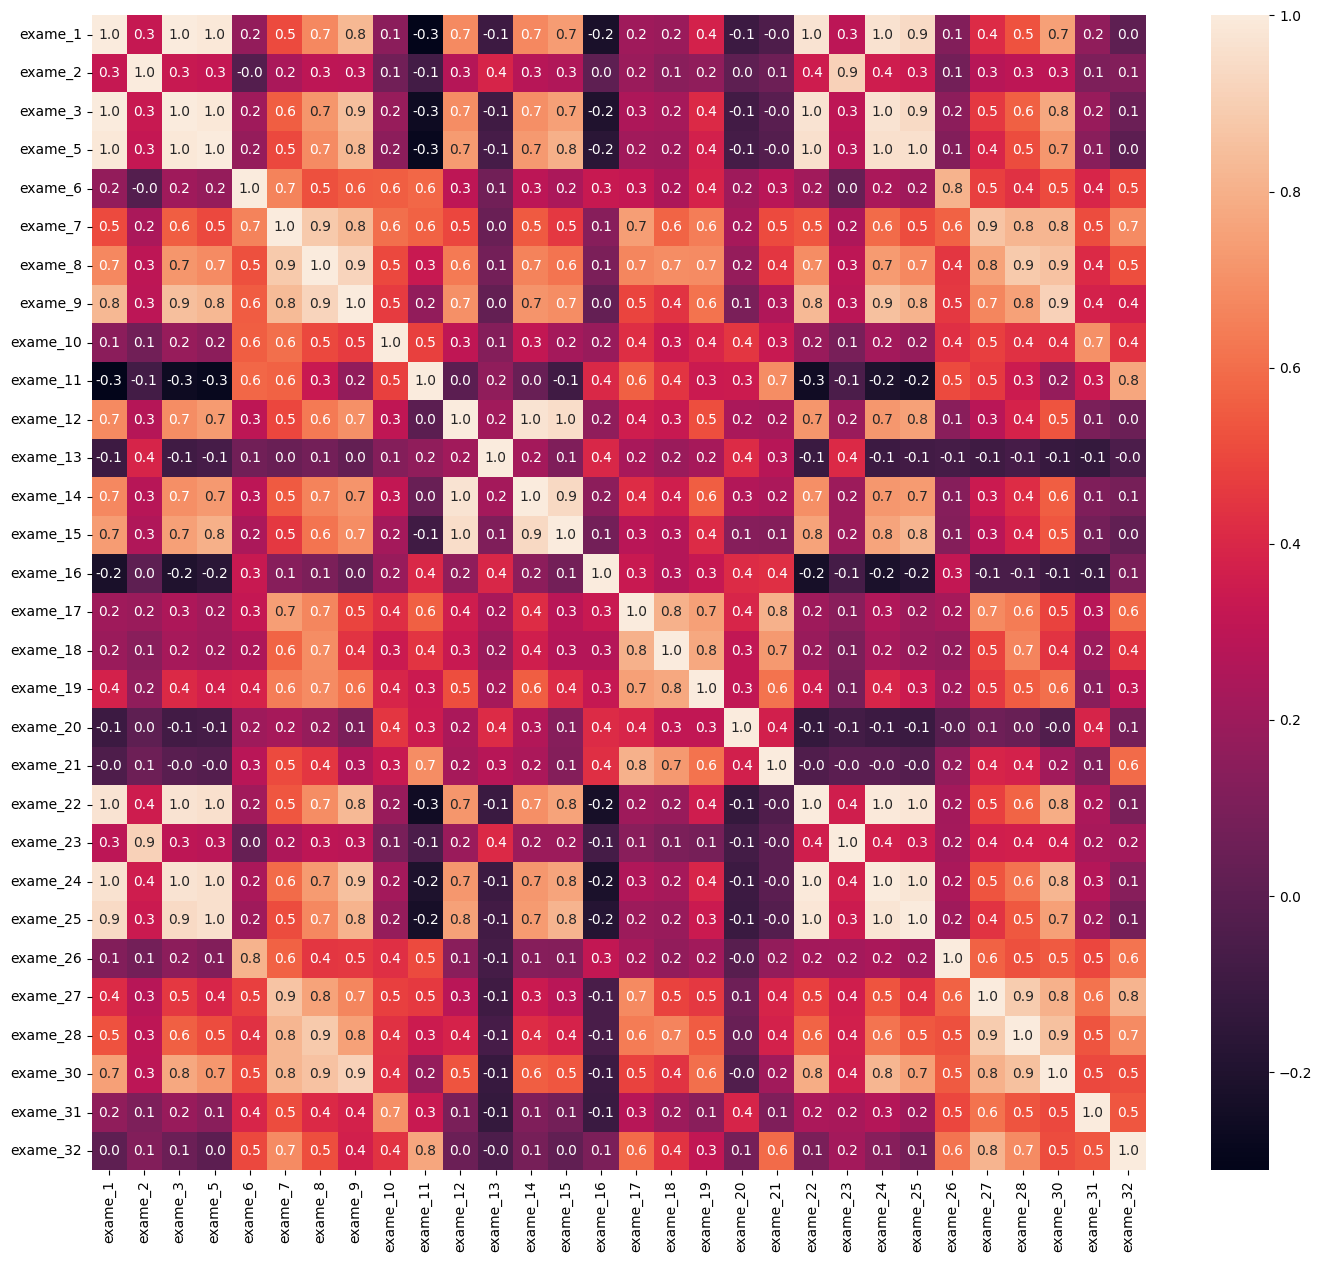

In [29]:
plt.figure(figsize = (17, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = '.1f')

# annot = valor da correlação dentro de cada quadradinho
# fmt = casa decimal do annot

In [30]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

Variaveis altamente correlacionadas

In [32]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [33]:
valores_exames_v4 = valores_exames_v3.drop(['exame_1', 'exame_3', 'exame_22', 'exame_24'], axis = 1)

classificar(valores_exames_v4)

Resultado da classificação: 91.81%


Diminuiu.

Ao excluir as variaveis altamente correlacionadas, excluímos as duas e era pra excluir apenas 1

Vamos excluir apenas a 3 e a 24

In [34]:
valores_exames_v5 = valores_exames_v3.drop(['exame_3', 'exame_24'], axis = 1)

classificar(valores_exames_v5)

Resultado da classificação: 92.98%


## Selecionar as K melhores features

In [35]:
selecionar_kmelhores = SelectKBest(chi2, k = 5) # selecionar as 5 melhores features de acordo com nossa função chi2
selecionar_kmelhores

SelectKBest(k=5, score_func=<function chi2 at 0x000001A4030DD1C0>)

Agora precisamos treinar nosso modelo e realizar a transformação dos dados.

In [36]:
# treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, diagnostico, test_size = 0.3)

# selecionar_kmelhores.fit(treino_x, treino_y)

Quando rodou esse código deu erro porque a chi2 não aceita valores negativos e em valores_exames_v5 possui numeros negativos, então vamos voltar pros dados antes da normalização e fazer todas as remoções que fizemos até chegar no valores_exames_v5

In [37]:
valores_exames_v6 = valores_exames_v1.drop(['exame_4', 'exame_29', 'exame_3', 'exame_24'], axis = 1)

In [38]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [39]:
# agora com 5 colunas
treino_kbest.shape, teste_kbest.shape

((398, 5), (171, 5))

In [40]:
classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_kbest, treino_y)
print(f'Resultado da classificação: {classificador.score(teste_kbest, teste_y) * 100:.2f}%')


Resultado da classificação: 92.40%


O último resultado que obtivemos antes desse tratamento foi de 92.98%, quando havíamos excluído apenas 4 features. Dessa vez, temos 92.40% utilizando apenas 5 features, uma redução de 85% do nosso conjunto de dados. Na realidade da Alura Care, supondo que cada exame tem o mesmo custo, tivemos uma redução de 85%! Isso parece um sucesso, não? Mas será que analisar somente a acurácia é o suficiente, ou seria mais interessante trabalharmos mais detalhadamente na análise dos nossos dados?

## Matriz de confusão

In [41]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
matriz_confusao

array([[100,   5],
       [  8,  58]], dtype=int64)

[Text(0.5, 49.249999999999986, 'Predição'), Text(86.25, 0.5, 'Real')]

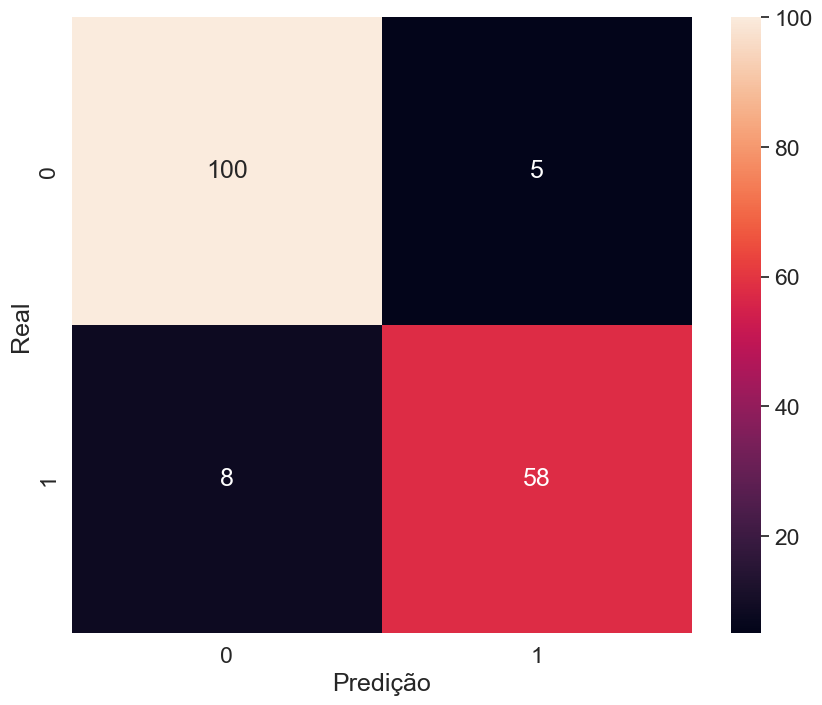

In [42]:
plt.figure(figsize = (10, 8))
sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')

Mas como interpretá-la? O eixo Y está representando nossos valores reais, e o eixo X representa os valores de predição. Temos 0 quando o diagnóstico é de um câncer benigno e 1 quando é de um câncer maligno. A soma dos dois quadrados superiores nos trará o total de cânceres diagnosticados como benignos, e a dos dois quadrados inferiores o total de cânceres diagnosticados como malignos.

De 105 casos benignos, nosso modelo acertou 100, classificando o restante (5) como maligno. Já nos casos de cânceres malignos, nosso modelo acertou 58, classificando 8 como benignos. Mas por que essas informações são importantes?

Em alguns casos, como na área da saúde, é muito importante sabermos qual classificação estamos acertando mais. Imagine, por exemplo, uma pessoa que realmente tem câncer, mas recebe o diagnóstico de que não tem. Esse tipo de equívoco no diagnóstico tornaria o tratamento mais difícil, afinal o tempo de realização impacta nas chances de cura desse tipo de doença.

## Seleção com RFE

In [43]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_rfe, treino_y)
print(f'Resultado da classificação: {classificador.score(teste_rfe, teste_y) * 100:.2f}%')

Resultado da classificação: 90.06%


[Text(0.5, 49.249999999999986, 'Predição'), Text(86.25, 0.5, 'Real')]

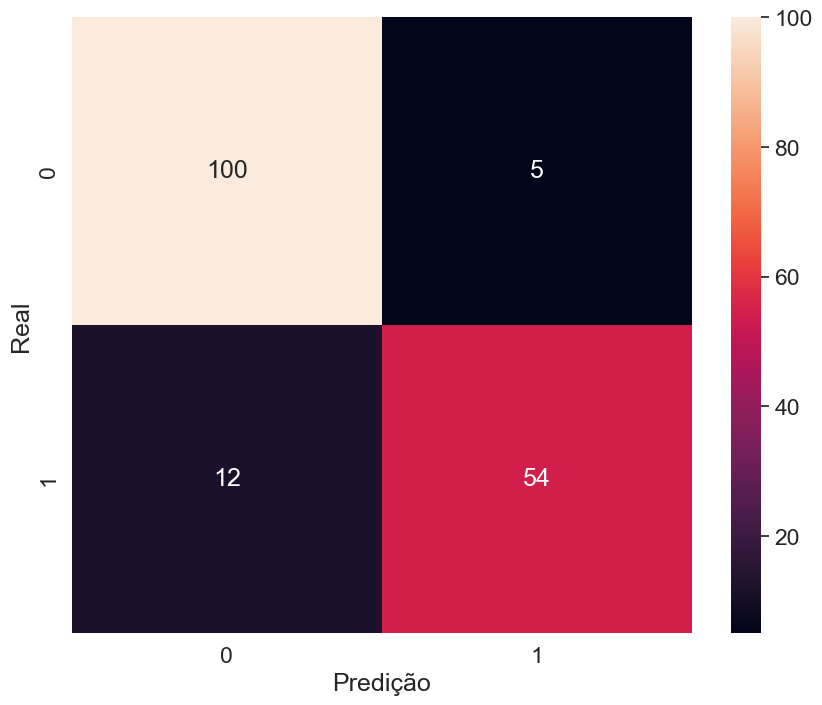

In [44]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))

plt.figure(figsize = (10, 8))
sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')

Metodo kbest foi melhor

A questão agora é: será que existe alguma técnica que nos informa qual conjunto de features gerará o melhor resultado? Essa técnica é o RFE Cross Validation.

## Seleção com RFECV

In [49]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_x, treino_y)

selecionador_rfecv = RFECV(estimator = classificador, cv = 5, scoring = 'accuracy', step = 1) # cv → número de divisões (folders)
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

print(f'Resultado da classificação: {classificador.score(teste_rfecv, teste_y) * 100:.2f}%')

Resultado da classificação: 92.98%


[Text(0.5, 49.249999999999986, 'Predição'), Text(86.25, 0.5, 'Real')]

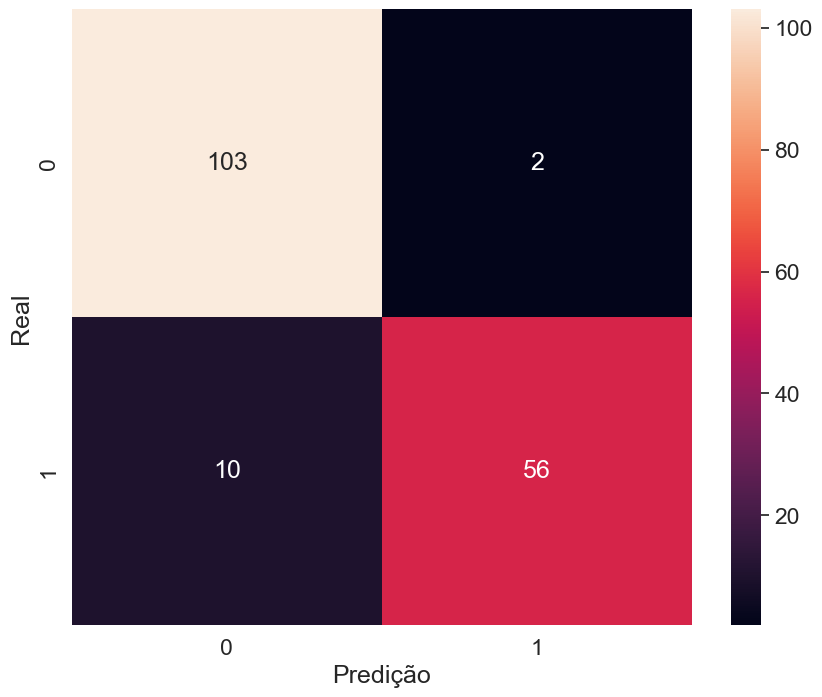

In [50]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))

plt.figure(figsize = (10, 8))
sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')

In [52]:
# Quantidade de feature que a seleção determinou que são as melhores
selecionador_rfecv.n_features_

# do professor deu 19

26

In [53]:
# Quais são?
selecionador_rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [54]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [59]:
selecionador_rfecv.cv_results_['mean_test_score'] 
# acuracia usando 1 features, 2 features... todas features

array([0.86936709, 0.93205696, 0.94727848, 0.94474684, 0.95231013,
       0.94974684, 0.95227848, 0.96234177, 0.94727848, 0.95224684,
       0.95981013, 0.96234177, 0.96484177, 0.96231013, 0.96234177,
       0.96231013, 0.96734177, 0.95731013, 0.96734177, 0.95984177,
       0.95734177, 0.94981013, 0.96484177, 0.95481013, 0.95231013,
       0.96981013, 0.96231013, 0.95984177])

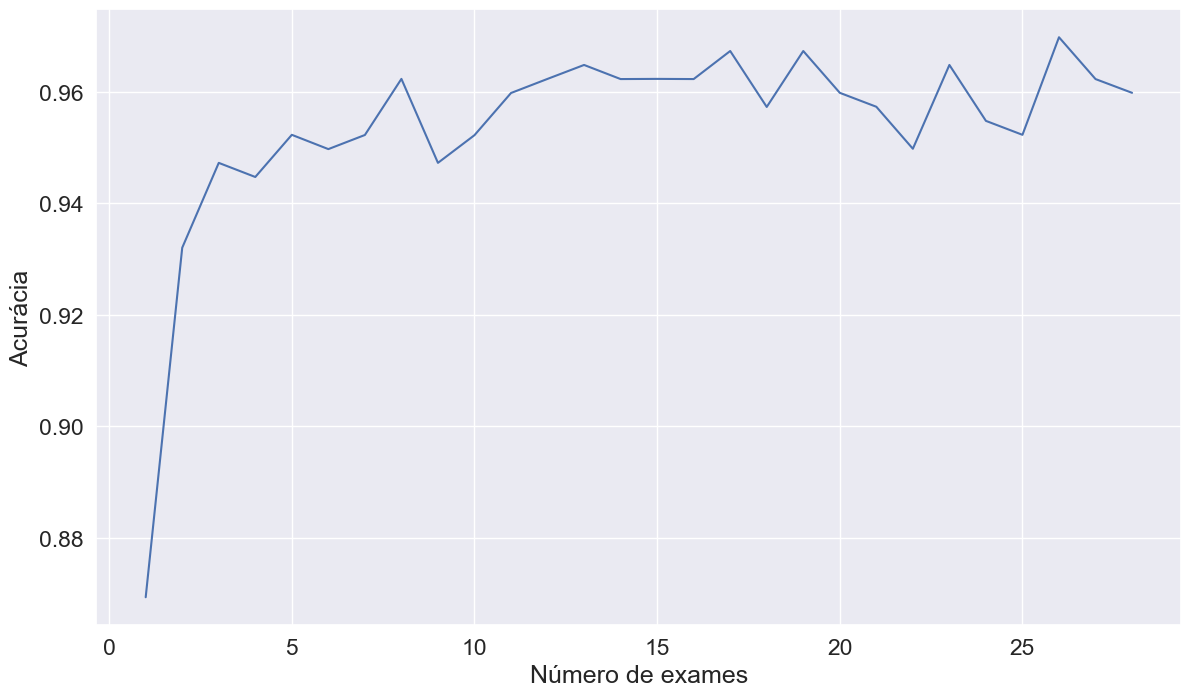

In [60]:
plt.figure(figsize = (14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

plt.plot(range(1, len(selecionador_rfecv.cv_results_['mean_test_score']) + 1), selecionador_rfecv.cv_results_['mean_test_score'])
plt.show()

Como é possível verificar no gráfico, 19 é o número de features que nos retorna o maior score. Mas por que 0.97 se nossa maior acurácia na verdade foi 94.15%? Isso acontece pois o retorno de grid_scores_ é uma média dos scores de cada um dos blocos entre os quais nosso conjunto foi dividido, e não um valor real.

Todos os métodos que utilizamos até o momento (SelectKBest, RFE e RFECV) selecionaram, como um filtro, algumas features, e por isso são chamados de "métodos de seleção de features" (feature selection methods). Mas será que existe outro tipo de método? Descobriremos no próximo vídeo!

## Visualizando dados no plano

In [61]:
resultados_exames

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


n_features_to_select = 2

In [66]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_x, treino_y)

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 2, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

print(f'Resultado da classificação: {classificador.score(teste_rfe, teste_y) * 100:.2f}%')

Resultado da classificação: 87.13%


[Text(0.5, 49.249999999999986, 'Predição'), Text(86.25, 0.5, 'Real')]

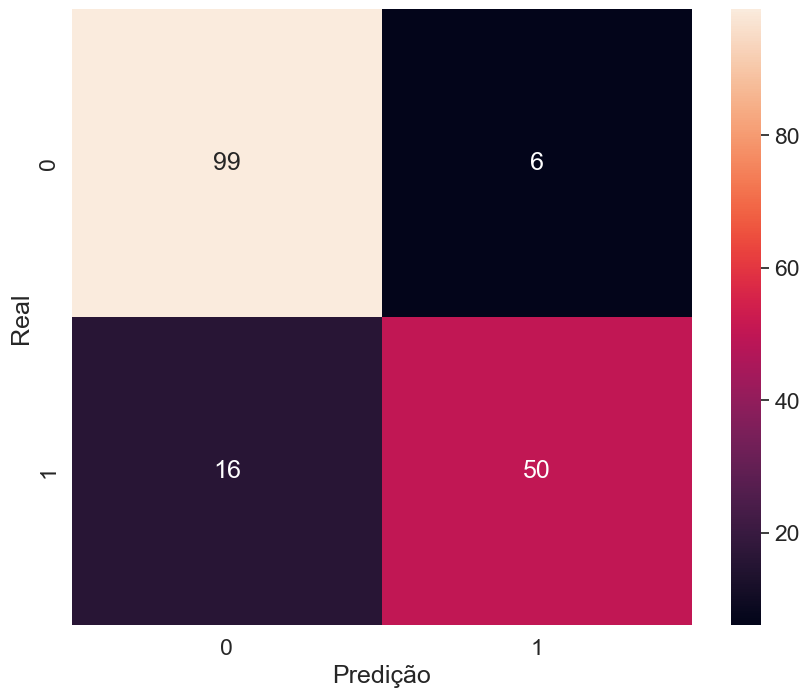

In [67]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))

plt.figure(figsize = (10, 8))
sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')

In [68]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)
valores_exames_v7.shape

(569, 2)

In [69]:
valores_exames_v7

array([[0.1471 , 0.2654 ],
       [0.07017, 0.186  ],
       [0.1279 , 0.243  ],
       ...,
       [0.05302, 0.1418 ],
       [0.152  , 0.265  ],
       [0.     , 0.     ]])

<Axes: >

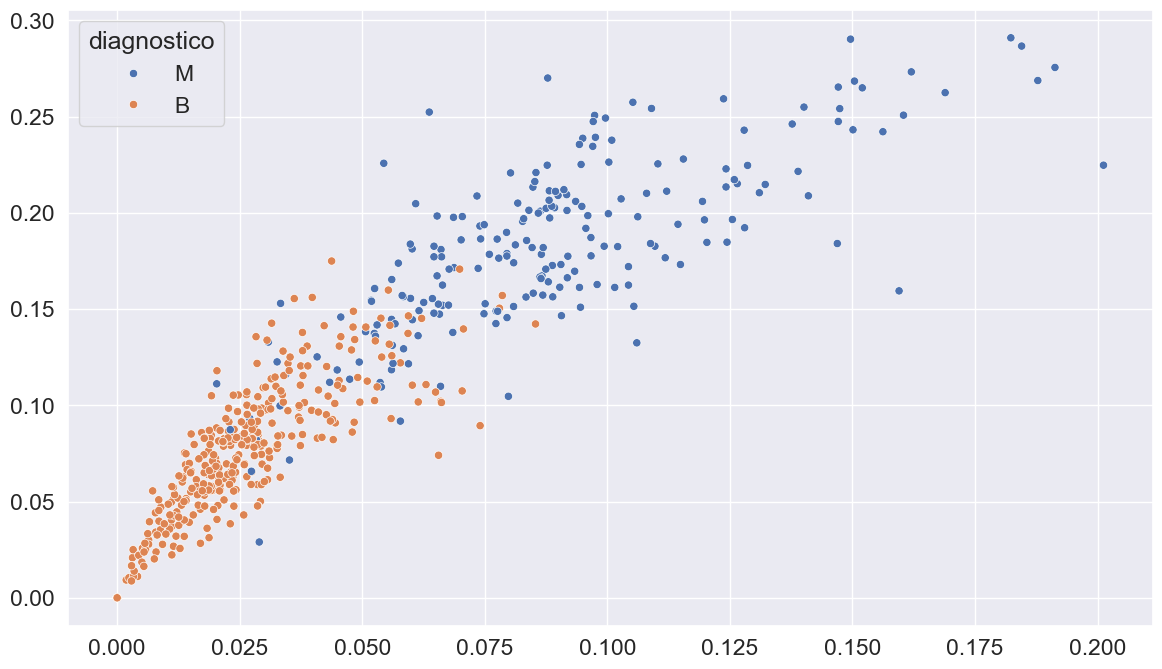

In [70]:
plt.figure(figsize = (14, 8))
sns.scatterplot(x = valores_exames_v7[:, 0], y = valores_exames_v7[:, 1], hue = diagnostico)

Teremos como resultado um gráfico de distribuição no qual cada ponto laranja é um câncer benigno e cada ponto azul é um câncer maligno. Porém, tendo excluído dimensões até restarem apenas duas, não estamos perdendo muita informação? Na verdade sim. Sendo assim, no caso de visualizações desse tipo, selecionar apenas duas features não é o mais adequado. Precisaremos encontrar uma maneira de preservar as características que irão diferenciar os tipos de câncer, e é isso que faremos no próximo vídeo. (tinha 28 dimensões pra 2)

Uma das técnicas que podemos utilizar para manter o máximo de informações possível em dimensionalidades reduzidas é o PCA. O PCA opera uma transformação matemática sobre os dados, na qual as primeiras dimensões serão as variáveis que manterão o maior volume possível de informação. Vamos aplicar o PCA nos nossos dados e verificar como ficará a visualização, já que a criada com o feature selection não nos pareceu uma ótima solução.

## PCA

In [75]:
pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v6)

In [77]:
# conjunto dos dados reduzidos a 2 dimensões
valores_exames_v8

array([[1157.37688421, -293.81017696],
       [1267.4687997 ,   15.91568628],
       [ 994.05000153,   39.07405468],
       ...,
       [ 313.54257115,   47.32093974],
       [1121.40671014,   33.68512999],
       [-769.01504719,  -87.76799118]])

<Axes: >

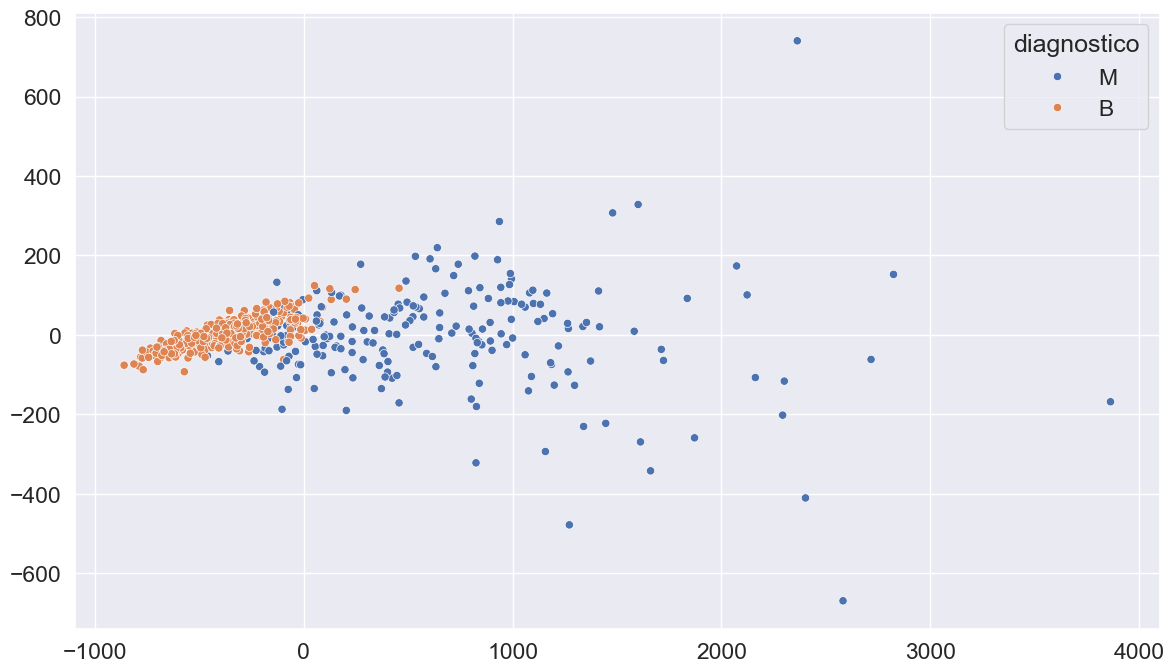

In [78]:
plt.figure(figsize = (14, 8))
sns.scatterplot(x = valores_exames_v8[:, 0], y = valores_exames_v8[:, 1], hue = diagnostico)

PCA vai se comportar melhor com os dados padronizados, então utilizar o v5 que os dados estão padronizados

In [80]:
valores_exames_v5

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,...,0.167980,1.901185,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,...,-0.490556,1.536720,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,...,0.036727,0.561361,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,...,0.904057,1.961239,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


<Axes: >

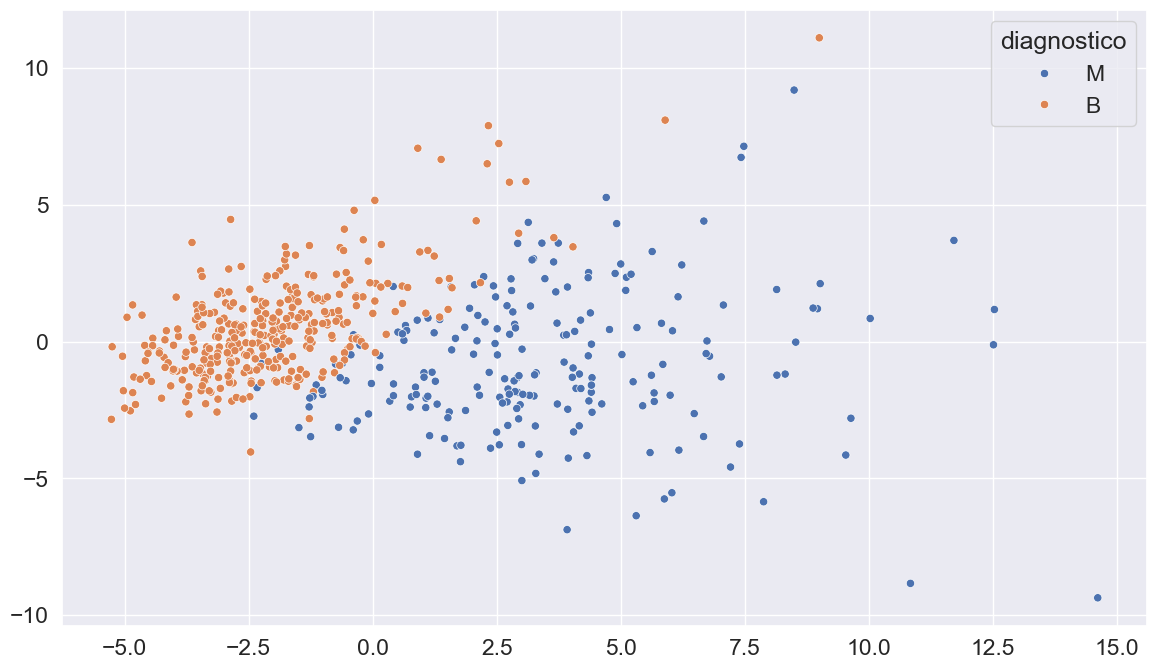

In [79]:
pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:, 0], y = valores_exames_v8[:, 1], hue = diagnostico)

Ainda existe uma técnica que se comporta melhor quando queremos gerar visualizações, chamada t-SNE, que também está presente no SKlearn. De maneira resumida, a t-SNE tenta manter as distâncias entre os pontos.

Por exemplo, se calcularmos a distância entre o ponto 0 e o ponto 1, teremos um valor em 28 dimensões, que é a quantidade de features do nosso conjunto. O t-SNE tenta manter a proporção dessas distâncias na redução para dimensões menores, permitindo que tenhamos uma noção de quão distante um ponto está do outro.

Para implementarmos, importaremos o TSNE do módulo sklearn.manifold e o instanciaremos da mesma forma que fizemos com o PCA. Em seguida, criaremos uma variável valores_exames_v9 que receberá o fit_transform() do conjunto valores_exames_v5, e plotaremos esse array em um gráfico de dispersão.

<Axes: >

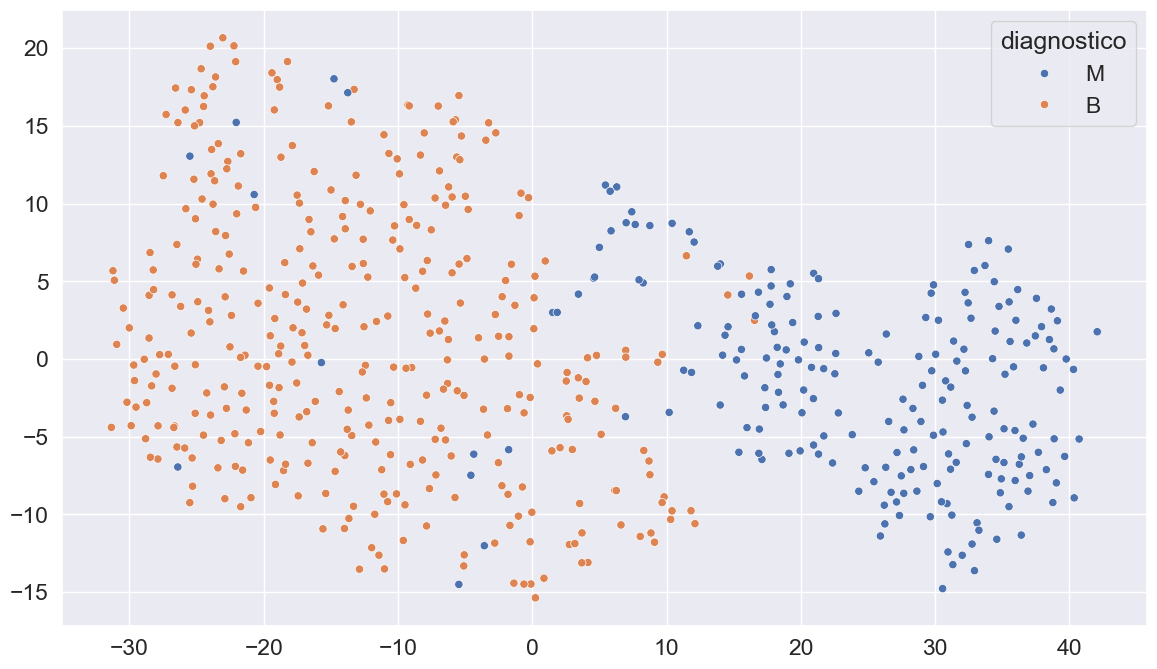

In [92]:
tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v9[:, 0], y = valores_exames_v9[:, 1], hue = diagnostico)

Como resultado, teremos uma visualização que separa muito bem os dados no espaço, tornando mais claro quais pontos estão próximos de um tipo de câncer maligno ou benigno. Assim, é bem mais simples determinar uma fronteira entre tais classificações.

Essas técnicas que realizam uma transformação matemática nos dados antes de processá-los, reduzindo suas dimensões, são chamadas justamente de "redução de dimensionalidade". A diferença entre a redução de dimensionalidade e a seleção de features é que a segunda funciona como um funil que filtra as principais características de uma base de dados original.